In [2]:
from transformers_from_scratch import Transformer, Longformer
import torch
import time
from tqdm import tqdm

vocab_size = 30000  # Common for BERT-based models
embed_dim = 512
num_heads = 8
window_size = 3
ffn_dim = 2048
num_layers = 6
max_len = 5000
dim_head = 64
dim_value = 64
dim_query = 64

transformer = Transformer(vocab_size, embed_dim, num_heads, ffn_dim, num_layers, max_len, dim_value, dim_query)
longformer = Longformer(vocab_size, embed_dim, num_heads, ffn_dim, num_layers, max_len, dim_value, dim_query, window_size)

# transformer.to('cuda:0')
# longformer.to('cuda:0')

In [ ]:
def compute_time_for_different_seq_lengths(vocab_size, embed_dim, num_heads, window_size, ffn_dim, num_layers, max_len, dim_value, dim_query, device='cuda:0'):
    # seq_lengths = list(range(5000))  # Extends to 2048 # Sequence lengths from 32 to 1024
    seq_lengths = [5, 10, 50, 200, 500, 1000, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750, 5000, 5250, 5500]
    list_times = []
    list_memory_usage = []


    transformer = Transformer(vocab_size, embed_dim, num_heads, ffn_dim, num_layers, max_len, dim_value, dim_query)
    longformer = Longformer(vocab_size, embed_dim, num_heads, ffn_dim, num_layers, max_len, dim_value, dim_query, window_size)
    transformer.to(device)
    longformer.to(device)

    for model in (transformer, longformer):
        # Reset peak memory stats
        model.to(device)
        # allocated, reserved = get_torch_memory()
        # Before execution

        torch.cuda.empty_cache()  # Ensure memory is clean
        times = []
        memory_usage = []
        for seq_len in tqdm(seq_lengths):
            torch.cuda.reset_peak_memory_stats()
            print(f'\n****seq_len = {seq_len}****')
            print(f"Before execution - Allocated: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
            print(f"Peak allocated: {torch.cuda.max_memory_allocated() / 1024**2:.2f} MB")            
            print(f"Reserved: {torch.cuda.memory_reserved() / 1024**2:.2f} MB")
            sample_input = torch.randint(0, vocab_size, (1, seq_len)).to(device)  # Batch of 1, variable seq_len
            # Measure time
            torch.cuda.synchronize()
            start_time = time.time()
            with torch.no_grad():
                model(sample_input)
            end_time = time.time()
            torch.cuda.synchronize()
            # After execution
            print(f"After execution - Allocated: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
            print(f"Reserved: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")
            print(f"Peak allocated: {torch.cuda.max_memory_allocated() / 1024**3:.2f} MB")            
            mem_after = torch.cuda.memory_allocated(device)
            memory_usage.append(torch.cuda.memory_reserved() / 1024**3)
            # Store time for this sequence length
            times.append(end_time - start_time)

            # Remove input tensor and clear cache
            del sample_input
            torch.cuda.empty_cache()

        list_times.append(times)
        list_memory_usage.append(memory_usage)

    return seq_lengths, list_times, list_memory_usage

  5%|▌         | 1/19 [00:00<00:03,  5.40it/s]


****seq_len = 50****
Before execution - Allocated: 587.07 MB
Peak allocated: 587.07 MB
Reserved: 606.00 MB
After execution - Allocated: 595.20 MB
Reserved: 0.62 GB
Peak allocated: 0.59 MB

****seq_len = 200****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.20 MB
Reserved: 0.64 GB
Peak allocated: 0.61 MB

****seq_len = 500****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.20 MB
Reserved: 0.74 GB
Peak allocated: 0.71 MB


 26%|██▋       | 5/19 [00:00<00:00, 20.04it/s]


****seq_len = 1000****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.21 MB
Reserved: 1.33 GB
Peak allocated: 1.08 MB

****seq_len = 2000****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.21 MB
Reserved: 3.51 GB
Peak allocated: 2.53 MB

****seq_len = 2250****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.22 MB
Reserved: 4.27 GB
Peak allocated: 3.04 MB

****seq_len = 2500****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 42%|████▏     | 8/19 [00:00<00:00, 13.11it/s]

After execution - Allocated: 595.22 MB
Reserved: 5.12 GB
Peak allocated: 3.62 MB

****seq_len = 2750****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.22 MB
Reserved: 6.07 GB
Peak allocated: 4.25 MB

****seq_len = 3000****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 53%|█████▎    | 10/19 [00:00<00:00, 10.21it/s]

After execution - Allocated: 595.22 MB
Reserved: 7.10 GB
Peak allocated: 4.94 MB

****seq_len = 3250****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.22 MB
Reserved: 8.22 GB
Peak allocated: 5.69 MB

****seq_len = 3500****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.23 MB
Reserved: 9.45 GB
Peak allocated: 6.50 MB

****seq_len = 3750****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 63%|██████▎   | 12/19 [00:01<00:00,  7.39it/s]

After execution - Allocated: 595.23 MB
Reserved: 10.75 GB
Peak allocated: 7.37 MB

****seq_len = 4000****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.23 MB
Reserved: 12.14 GB
Peak allocated: 8.29 MB

****seq_len = 4250****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 74%|███████▎  | 14/19 [00:02<00:01,  4.78it/s]

After execution - Allocated: 595.23 MB
Reserved: 13.62 GB
Peak allocated: 9.28 MB

****seq_len = 4500****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 79%|███████▉  | 15/19 [00:02<00:01,  3.70it/s]

After execution - Allocated: 595.23 MB
Reserved: 15.19 GB
Peak allocated: 10.33 MB

****seq_len = 4750****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 84%|████████▍ | 16/19 [00:03<00:01,  2.94it/s]

After execution - Allocated: 595.23 MB
Reserved: 16.85 GB
Peak allocated: 11.44 MB

****seq_len = 5000****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 89%|████████▉ | 17/19 [00:03<00:00,  2.48it/s]

After execution - Allocated: 595.24 MB
Reserved: 18.59 GB
Peak allocated: 12.61 MB

****seq_len = 5250****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 95%|█████████▍| 18/19 [00:04<00:00,  2.08it/s]

After execution - Allocated: 595.24 MB
Reserved: 20.43 GB
Peak allocated: 13.84 MB

****seq_len = 5500****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


100%|██████████| 19/19 [00:05<00:00,  3.53it/s]


After execution - Allocated: 595.24 MB
Reserved: 22.35 GB
Peak allocated: 15.12 MB


 26%|██▋       | 5/19 [00:00<00:00, 29.60it/s]


****seq_len = 50****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.20 MB
Reserved: 0.62 GB
Peak allocated: 0.59 MB

****seq_len = 200****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.20 MB
Reserved: 0.64 GB
Peak allocated: 0.61 MB

****seq_len = 500****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.20 MB
Reserved: 0.74 GB
Peak allocated: 0.71 MB

****seq_len = 1000****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.21 MB
Reserved: 1.11 GB
Peak allocated: 1.08 MB

****seq_len = 2000****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.21 MB
Reserved: 3.51 GB
Peak allocated: 2.53 MB

****seq_len = 2250****
Before execution - Alloca

 42%|████▏     | 8/19 [00:00<00:00, 12.43it/s]

After execution - Allocated: 595.22 MB
Reserved: 4.29 GB
Peak allocated: 4.25 MB

****seq_len = 3000****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.22 MB
Reserved: 4.97 GB
Peak allocated: 4.94 MB

****seq_len = 3250****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 53%|█████▎    | 10/19 [00:00<00:00,  9.84it/s]

After execution - Allocated: 595.22 MB
Reserved: 5.72 GB
Peak allocated: 5.69 MB

****seq_len = 3500****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.23 MB
Reserved: 6.55 GB
Peak allocated: 6.50 MB

****seq_len = 3750****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 63%|██████▎   | 12/19 [00:01<00:00,  7.79it/s]

After execution - Allocated: 595.23 MB
Reserved: 7.42 GB
Peak allocated: 7.37 MB

****seq_len = 4000****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB
After execution - Allocated: 595.23 MB
Reserved: 8.35 GB
Peak allocated: 8.30 MB


 68%|██████▊   | 13/19 [00:01<00:00,  7.09it/s]


****seq_len = 4250****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 74%|███████▎  | 14/19 [00:01<00:00,  6.13it/s]

After execution - Allocated: 595.23 MB
Reserved: 9.33 GB
Peak allocated: 9.29 MB

****seq_len = 4500****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 79%|███████▉  | 15/19 [00:01<00:00,  5.42it/s]

After execution - Allocated: 595.23 MB
Reserved: 10.38 GB
Peak allocated: 10.33 MB

****seq_len = 4750****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 84%|████████▍ | 16/19 [00:02<00:00,  4.71it/s]

After execution - Allocated: 595.23 MB
Reserved: 11.49 GB
Peak allocated: 11.44 MB

****seq_len = 5000****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 89%|████████▉ | 17/19 [00:02<00:00,  3.37it/s]

After execution - Allocated: 595.24 MB
Reserved: 12.65 GB
Peak allocated: 12.61 MB

****seq_len = 5250****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


 95%|█████████▍| 18/19 [00:03<00:00,  2.55it/s]

After execution - Allocated: 595.24 MB
Reserved: 20.45 GB
Peak allocated: 13.84 MB

****seq_len = 5500****
Before execution - Allocated: 595.20 MB
Peak allocated: 595.20 MB
Reserved: 606.00 MB


100%|██████████| 19/19 [00:04<00:00,  4.53it/s]

After execution - Allocated: 595.24 MB
Reserved: 22.37 GB
Peak allocated: 15.12 MB


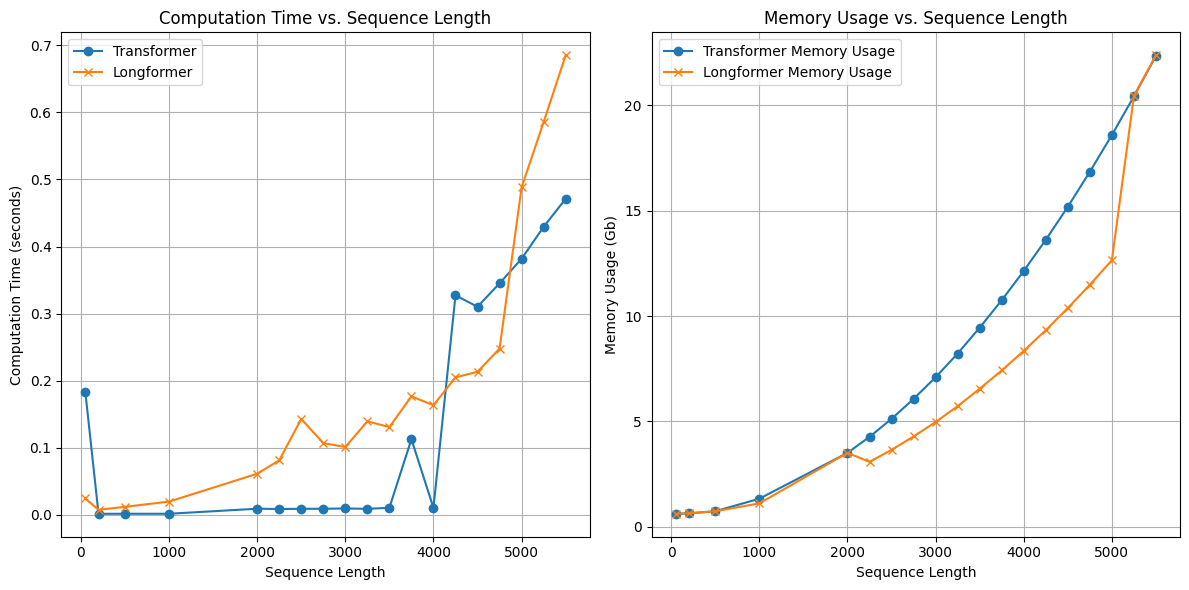

In [4]:
import matplotlib.pyplot as plt

vocab_size = 30000  # Common for BERT-based models
embed_dim = 512
num_heads = 8
window_size = 3
ffn_dim = 2048
num_layers = 6
max_len = 10000
dim_head = 64
dim_value = 64
dim_query = 64

seq_lengths, times, memory_usage = compute_time_for_different_seq_lengths(vocab_size=vocab_size, embed_dim=embed_dim, num_heads=num_heads, ffn_dim=ffn_dim, num_layers=num_layers, max_len=max_len, window_size=window_size, dim_value=dim_value, dim_query=dim_query, device='cuda:0')

# Plotting Computation Time vs Sequence Length
plt.figure(figsize=(12, 6))

# Subplot 1: Computation Time
plt.subplot(1, 2, 1)
plt.plot(seq_lengths, times[0], marker='o', label='Transformer')
plt.plot(seq_lengths, times[1], marker='x', label='Longformer')
plt.title("Computation Time vs. Sequence Length")
plt.xlabel("Sequence Length")
plt.ylabel("Computation Time (seconds)")
plt.legend()
plt.grid(True)

# Subplot 2: Memory Usage
plt.subplot(1, 2, 2)
plt.plot(seq_lengths, memory_usage[0], marker='o', label='Transformer Memory Usage')
plt.plot(seq_lengths, memory_usage[1], marker='x', label='Longformer Memory Usage')
plt.title("Memory Usage vs. Sequence Length")
plt.xlabel("Sequence Length")
plt.ylabel("Memory Usage (Gb)")
plt.legend()
plt.grid(True)

# Display both plots
plt.tight_layout()
plt.show()

In [5]:
import numpy as np
from scipy.stats import linregress

for t in times:
# Take the natural logarithm of both arrays
    log_seq = np.log(seq_lengths)
    log_time = np.log(t)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(log_seq, log_time)

    # The slope is the exponent alpha
    alpha = slope

    print(f"Estimated alpha: {alpha}")

Estimated alpha: 0.6581024018142169
Estimated alpha: 0.8458407057587986


In [6]:
for m in memory_usage:
# Take the natural logarithm of both arrays
    log_seq = np.log(seq_lengths)
    log_mem = np.log(m)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(log_mem, log_time)
    print(f'slope = {slope}, intercept = {intercept}')
    # The slope is the exponent alpha
    alpha = slope

    print(f"Estimated alpha: {alpha}")

slope = 1.0194406867468664, intercept = -4.041829579218112
Estimated alpha: 1.0194406867468664
slope = 1.1050758677299926, intercept = -3.9288836992621756
Estimated alpha: 1.1050758677299926
